# Breast Cancer Survival Period Prediction: Regression

Starting with importing the datset from a.csv file and replacing entries with codes representing missing values. We aslo drop any rows with missing values in either Diagnosis year (YEAR_DX) or Survival Time in Months (SRV_TIME_MON) as these values directly affect the target variable and hence, removed from model training.

In [1]:
import pandas as pd

breast_cancer=pd.read_csv('final_breast_cancer.csv',index_col=0)

breast_cancer.replace(to_replace={'MAR_STAT':9,'RACE1V':99,'AGE_DX':999,'SEQ_NUM':99,
                                  'Lateral':9,'GRADE':9,'DX_CONF':9,'CSEXTEN':999,
                                  'CSLYMPHN':999,'DAJCCT':88,'DAJCCN':88,'DAJCCM':88,
                                  'SURGSCOF':9,'SURGSITF':9,'NO_SURG':9,'AGE_1REC':99,
                                  'RAC_RECA':9,'RAC_RECY':9,'HST_STGA':9,'INTPRIM':9,
                                  'ERSTATUS':9,'PRSTATUS':9,'SRV_TIME_MON':9999,'SRV_TIME_MON_FLAG':9,
                                  'HER2':9,'BRST_SUB':9,'MALIGCOUNT':99,'BENBORDCOUNT':99,
                                  'RAD_SURG':9},value=pd.np.nan,inplace=True)

breast_cancer.replace({'EOD10_PN':{95:pd.np.nan,96:pd.np.nan,97:pd.np.nan,98:pd.np.nan,99:pd.np.nan},
                       'EOD10_NE':{95:pd.np.nan,96:pd.np.nan,97:pd.np.nan,98:pd.np.nan,99:pd.np.nan},
                       'CSTUMSIZ':{990:0,991:10,992:20,993:30,994:40,995:50,996:pd.np.nan,997:pd.np.nan,998:pd.np.nan,
                                   999:pd.np.nan,888:pd.np.nan},
                       'DAJCCSTG':{88:pd.np.nan,90:pd.np.nan,99:pd.np.nan},
                       'DSS1977S':{8:pd.np.nan,9:pd.np.nan},'SURGPRIF':{90:pd.np.nan,98:pd.np.nan,99:pd.np.nan},
                       'ADJTM_6VALUE':{88:pd.np.nan,99:pd.np.nan},'ADJNM_6VALUE':{88:pd.np.nan,99:pd.np.nan},
                       'ADJM_6VALUE':{88:pd.np.nan,99:pd.np.nan},'ADJAJCCSTG':{88:pd.np.nan,90:pd.np.nan,99:pd.np.nan}
                       },inplace=True)

breast_cancer.dropna(axis=0,how='any',subset=['YEAR_DX','SRV_TIME_MON'],inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(breast_cancer.head(3))

C:\Users\dshre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (134,135,136,137,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if sys.path[0] == '':
C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app
C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.

              REG  MAR_STAT  RACE1V  NHIADE  SEX  AGE_DX  YR_BRTH  SEQ_NUM  \
PUBCSNUM                                                                     
5100108.0  1502.0       5.0     1.0     NaN  2.0    65.0   1946.0      2.0   
5100156.0  1502.0       2.0     1.0     NaN  2.0    78.0   1926.0      2.0   
5100170.0  1502.0       1.0     1.0     NaN  2.0    67.0   1940.0      3.0   

           MDXRECMP  YEAR_DX PRIMSITE  LATERAL  HISTO2V  BEHO2V  HISTO3V  \
PUBCSNUM                                                                   
5100108.0      10.0   2011.0     C504      2.0   8230.0     2.0   8230.0   
5100156.0       6.0   2005.0     C501      1.0   8500.0     2.0   8500.0   
5100170.0       4.0   2008.0     C504      2.0   8500.0     2.0   8523.0   

           BEHO3V  GRADE  DX_CONF  REPT_SRC  EOD10_SZ  EOD10_EX  EOD10_PE  \
PUBCSNUM                                                                    
5100108.0     2.0    2.0      1.0       1.0       NaN       NaN       NaN 

We are looking for % Missing in each column of the dataset. Those columns with more than 20% missing, are measured across different timeperiods or not related measurements to this type of cancer. Hence, they are removed.

In [2]:
columns=breast_cancer.isna().sum(axis=0)/len(breast_cancer)
columns_list=list(columns[columns<0.2].index)

breast_cancer=breast_cancer.filter(items=columns_list,axis=1)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print('% Missing in each column')
    print(columns)

% Missing in each column
REG                  0.000000
MAR_STAT             0.054712
RACE1V               0.005031
NHIADE               1.000000
SEX                  0.000000
AGE_DX               0.000039
YR_BRTH              0.000039
SEQ_NUM              0.000008
MDXRECMP             0.000000
YEAR_DX              0.000000
PRIMSITE             0.000000
LATERAL              0.000000
HISTO2V              0.000000
BEHO2V               0.000000
HISTO3V              0.000000
BEHO3V               0.000000
GRADE                0.104800
DX_CONF              0.002178
REPT_SRC             0.000000
EOD10_SZ             1.000000
EOD10_EX             1.000000
EOD10_PE             1.000000
EOD10_ND             1.000000
EOD10_PN             0.268726
EOD10_NE             0.029288
EOD13                1.000000
EOD2                 1.000000
EOD4                 1.000000
EOD_CODE             1.000000
TUMOR_1V             1.000000
TUMOR_2V             1.000000
TUMOR_3V             1.000000
CSTUMSIZ       

Now, we are treating all the other columns for their missing values. For the categorical variables, the missing values are filled with the mode while the median is used for Quantitative Variables. The columns which directly affect the target variable or are irrelevant to this type of cancer from domain knowledge are removed.

In [3]:
stats=breast_cancer.describe().loc['50%']
catg=breast_cancer.mode()

drop_cols=['MDXRECMP','YEAR_DX','CSVFIRST','CSVLATES','CSVCURRENT','ICCC3WHO',
           'ICCC3XWHO','CODPUB','CODPUBKM','STAT_REC','IHSLINK','VSRTSADX','ODTHCLASS',
           'CSTSEVAL','CSRGEVAL','CSMTEVAL','ST_CNTY','SRV_TIME_MON','SRV_TIME_MON_FLAG',
           '1year_survival','5year_survival']
catg_cols=['REG','MAR_STAT','RACE1V','SEX','PRIMSITE','LATERAL','BEHO2V', 'BEHO3V','GRADE',
           'DX_CONF','REPT_SRC','CSMETSDX','DAJCCT','DAJCCN','DAJCCM','DAJCCSTG','DSS1977S',
           'SCSSM2KO','SURGPRIF','SURGSITF','NO_SURG','TYPE_FU','AGE_1REC','SITERWHO',
           'ICDOTO9V','ICDOT10V','BEHTREND','HISTREC','HISTRECB','CS0204SCHEMA','RAC_RECA',
           'RAC_RECY','ORIGRECB','HST_STGA','FIRSTPRM','SUMM2K','AYASITERWHO','LYMSUBRWHO',
           'INTPRIM','ERSTATUS','PRSTATUS','CSSCHEMA','ADJTM_6VALUE','ADJNM_6VALUE',
           'ADJM_6VALUE','ADJAJCCSTG','ANNARBOR','RADIATNR','RAD_SURG','CHEMO_RX_REC']
num_cols=['AGE_DX','YR_BRTH','SEQ_NUM','EOD10_NE','CSTUMSIZ','CSEXTEN','CSLYMPHN',
          'HISTO2V','HISTO3V','CS1SITE','CS2SITE','CS3SITE','CS4SITE','CS5SITE',
          'CS6SITE','CS25SITE','REC_NO','MALIGCOUNT','BENBORDCOUNT']

values=dict()
for i in catg_cols:
    values[i]=catg[i][0]
for i in num_cols:
    values[i]=stats[i]

breast_cancer.fillna(value=values,inplace=True)

print(values)

{'REG': 1541.0, 'MAR_STAT': 2.0, 'RACE1V': 1.0, 'SEX': 2.0, 'PRIMSITE': 'C504', 'LATERAL': 2.0, 'BEHO2V': 3.0, 'BEHO3V': 3.0, 'GRADE': 2.0, 'DX_CONF': 1.0, 'REPT_SRC': 1.0, 'CSMETSDX': 0.0, 'DAJCCT': 18.0, 'DAJCCN': 0.0, 'DAJCCM': 0.0, 'DAJCCSTG': 10.0, 'DSS1977S': 1.0, 'SCSSM2KO': 1.0, 'SURGPRIF': 22.0, 'SURGSITF': 0.0, 'NO_SURG': 0.0, 'TYPE_FU': 2.0, 'AGE_1REC': 13.0, 'SITERWHO': 26000.0, 'ICDOTO9V': 1744.0, 'ICDOT10V': 'C504', 'BEHTREND': 3.0, 'HISTREC': 9.0, 'HISTRECB': 98.0, 'CS0204SCHEMA': 13.0, 'RAC_RECA': 1.0, 'RAC_RECY': 1.0, 'ORIGRECB': 0.0, 'HST_STGA': 1.0, 'FIRSTPRM': 1.0, 'SUMM2K': 1.0, 'AYASITERWHO': 36.0, 'LYMSUBRWHO': 99.0, 'INTPRIM': 1.0, 'ERSTATUS': 1.0, 'PRSTATUS': 1.0, 'CSSCHEMA': 58.0, 'ADJTM_6VALUE': 18.0, 'ADJNM_6VALUE': 0.0, 'ADJM_6VALUE': 0.0, 'ADJAJCCSTG': 10.0, 'ANNARBOR': 8.0, 'RADIATNR': 0.0, 'RAD_SURG': 0.0, 'CHEMO_RX_REC': 0.0, 'AGE_DX': 61.0, 'YR_BRTH': 1949.0, 'SEQ_NUM': 0.0, 'EOD10_NE': 2.0, 'CSTUMSIZ': 16.0, 'CSEXTEN': 100.0, 'CSLYMPHN': 0.0, 'HISTO2V

Importing all our required packages.

In [4]:
from numpy.random import seed
from tensorflow import set_random_seed

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Conv1D,Flatten
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from keras import backend
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

C:\Users\dshre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dshre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dshre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dshre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

Seperating our dataset into Predictors(data) set and Target Variable and getting dummy variables for all the categorical variables identified before. This inflates our dataset significantly as seen with the shape below.

In [5]:
data=breast_cancer.drop(columns=drop_cols)
target=pd.DataFrame(breast_cancer['SRV_TIME_MON'])
data=pd.get_dummies(data,prefix=catg_cols,columns=catg_cols,drop_first=False)

print(data.shape)

(963596, 429)


Normalizing both the Predictors and Target using a MinMaxScaler. Normalization is required to help with faster and more accurate training of Neural Networks. As Target variable is normalized too, the Root Mean Square Error can be read as a percentage.

In [6]:
scaler1=MinMaxScaler()
scaler2=MinMaxScaler()

data_scaled=pd.DataFrame(scaler1.fit_transform(data),index=data.index,columns=data.columns)
target_scaled=pd.DataFrame(scaler2.fit_transform(target),index=target.index,columns=target.columns)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data_scaled.head(2))
    print(target_scaled.head(2))

             AGE_DX   YR_BRTH  SEQ_NUM   HISTO2V   HISTO3V  EOD10_NE  \
PUBCSNUM                                                               
5100108.0  0.543103  0.451327     0.04  0.145570  0.145570  0.033333   
5100156.0  0.655172  0.274336     0.04  0.316456  0.316456  0.022222   

           CSTUMSIZ  CSEXTEN  CSLYMPHN  CS1SITE  CS2SITE   CS3SITE   CS4SITE  \
PUBCSNUM                                                                       
5100108.0  0.005056      0.0       0.0      0.0      0.0  0.000000  0.001013   
5100156.0  0.008089      0.0       0.0      0.0      0.0  0.989899  0.000000   

           CS5SITE   CS6SITE  CS25SITE  REC_NO  MALIGCOUNT  BENBORDCOUNT  \
PUBCSNUM                                                                   
5100108.0      0.0  0.010132       0.0     0.0    0.020408           0.0   
5100156.0      0.0  0.010132       0.0     0.0    0.020408           0.0   

           REG_1501.0  REG_1502.0  REG_1520.0  REG_1521.0  REG_1522.0  \
PUBCSNUM    

Defining Custom Functions for RMSE and R-Square values as they are not defined in Keras.metrics

In [7]:
def rmse(y_true,y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true)))

def r_sq(y_true, y_pred):
    SS_res =  backend.sum(backend.square( y_true-y_pred )) 
    SS_tot = backend.sum(backend.square( y_true - backend.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + backend.epsilon()) )

## ANN Model 

A function to define the structure of the ANN with 3 hidden layers with [100,60,20] neurons each and ReLU activation function. The output layer is just a single neuron with no activation function as this is a regression problem.

Loss Function- Mean Squared Error

Optimizer- ADAM

Observed Metrics- MSE, RMSE, R-Square

In [8]:
def build_model_ann():
    model=Sequential()
    
    model.add(Dense(100, input_dim=data.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse',rmse,r_sq])
    
    return model

Building a scikit wrapper on top of Keras model to be able use the functions from Scikit-Learn for easier training.

An initial fit of the model is developed over a large number of epochs to determine point of overfitting of the model. The whole dataset is also split into training and test sets in the ratio of 80:20.

In [9]:
estimators=KerasRegressor(build_fn=build_model_ann, epochs=50, batch_size=256, verbose=1)
train_data,test_data,train_target,test_target=train_test_split(data_scaled,target_scaled,test_size=0.2,random_state=21)

seed(21)
set_random_seed(21)

history=estimators.fit(train_data,train_target,validation_data=(test_data,test_target))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 770876 samples, validate on 192720 samples
Epoch 1/50
770876/770876 [==============================] - 56s 73us/step - loss: 0.0379 - mean_squared_error: 0.0379 - rmse: 0.1901 - r_sq: 0.5172 - val_loss: 0.0257 - val_mean_squared_error: 0.0257 - val_rmse: 0.1599 - val_r_sq: 0.6707
Epoch 2/50
770876/770876 [==============================] - 43s 56us/step - loss: 0.0235 - mean_squared_error: 0.0235 - rmse: 0.1530 - r_sq: 0.6998 - val_loss: 0.0296 - val_mean_squared_error: 0.0296 - val_rmse: 0.1719 - val_r_sq: 0.6204
Epoch 3/50
770876/770876 [==============================] - 40s 52us/step - loss: 0.0222 - mean_squared_error: 0.0222 - rmse: 0.1485 - r_sq: 0.7170 - val_loss: 0.0217 - val_mean_squared_error: 0.0217 - val_rmse: 0.1468 - val_r_sq: 0.7222
Epoch 4/50
770876/770876 [==============================] - 41s 53us/step - loss: 0.0211 - mean_squared_error: 0.0

C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


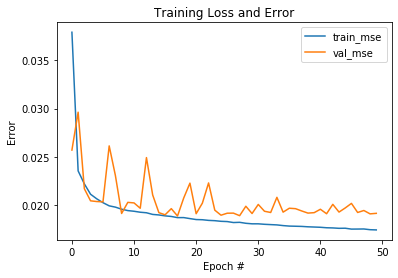

In [10]:
epoch_num = pd.np.arange(0, 50)
plt.figure()
plt.plot(epoch_num, history.history["mean_squared_error"], label="train_mse")
plt.plot(epoch_num, history.history["val_mean_squared_error"], label="val_mse")
#plt.plot(epoch_num, history.history["r_sq"], label="train_r_square")
#plt.plot(epoch_num, history.history["val_r_sq"], label="val_r_square")
plt.title("Training Loss and Error")
plt.xlabel("Epoch #")
plt.ylabel("Error")
plt.legend()
plt.savefig('Breast Cancer ANN.png')

From the Training Graph, it is evident that the training and validation loss start diverging near the 20th epoch with validation stabilizing and training loss still decreasing. Hence, 20 is selcted as the cutoff for nmber of epochs.

Cross Validation is Performed to validate that the validation error do not deviate much when trained across differnet splits of the same dataset.

In [11]:
estimators=KerasRegressor(build_fn=build_model_ann, epochs=20, batch_size=256, verbose=1)

kfold = KFold(n_splits=5)
results = cross_val_score(estimators, data_scaled, target_scaled, cv=kfold)

Epoch 1/20
770876/770876 [==============================] - 41s 53us/step - loss: 0.0374 - mean_squared_error: 0.0374 - rmse: 0.1893 - r_sq: 0.5131
Epoch 2/20
770876/770876 [==============================] - 36s 46us/step - loss: 0.0233 - mean_squared_error: 0.0233 - rmse: 0.1521 - r_sq: 0.6974
Epoch 3/20
770876/770876 [==============================] - 35s 46us/step - loss: 0.0217 - mean_squared_error: 0.0217 - rmse: 0.1470 - r_sq: 0.7169
Epoch 4/20
770876/770876 [==============================] - 35s 46us/step - loss: 0.0208 - mean_squared_error: 0.0208 - rmse: 0.1439 - r_sq: 0.7286
Epoch 5/20
770876/770876 [==============================] - 29s 37us/step - loss: 0.0203 - mean_squared_error: 0.0203 - rmse: 0.1419 - r_sq: 0.7362
Epoch 6/20
770876/770876 [==============================] - 23s 30us/step - loss: 0.0198 - mean_squared_error: 0.0198 - rmse: 0.1404 - r_sq: 0.7415
Epoch 7/20
770876/770876 [==============================] - 25s 32us/step - loss: 0.0196 - mean_squared_error: 0

Finding the mean and standard deviation of the Mean Squared Error form Cross Validation. We can see that it doesnot deviate much for different splits on the dataset.

In [12]:
print("MSE Score: %.6f (%.6f) MSE" % (results.mean(), results.std()))

print(results)

MSE Score: -0.025473 (0.003429) MSE
[-0.03025379 -0.02346243 -0.02413918 -0.02094116 -0.02856924]


Refitting the dataset without overfitting over large number of epochs here. 

In [13]:
estimators=KerasRegressor(build_fn=build_model_ann, epochs=20, batch_size=256, verbose=1)
history=estimators.fit(train_data,train_target,validation_data=(test_data,test_target))

Train on 770876 samples, validate on 192720 samples
Epoch 1/20
770876/770876 [==============================] - 99s 128us/step - loss: 0.0384 - mean_squared_error: 0.0384 - rmse: 0.1914 - r_sq: 0.5111 - val_loss: 0.0246 - val_mean_squared_error: 0.0246 - val_rmse: 0.1565 - val_r_sq: 0.6847
Epoch 2/20
770876/770876 [==============================] - 30s 38us/step - loss: 0.0236 - mean_squared_error: 0.0236 - rmse: 0.1532 - r_sq: 0.6991 - val_loss: 0.0223 - val_mean_squared_error: 0.0223 - val_rmse: 0.1490 - val_r_sq: 0.7137
Epoch 3/20
770876/770876 [==============================] - 28s 37us/step - loss: 0.0221 - mean_squared_error: 0.0221 - rmse: 0.1481 - r_sq: 0.7185 - val_loss: 0.0226 - val_mean_squared_error: 0.0226 - val_rmse: 0.1499 - val_r_sq: 0.7107
Epoch 4/20
770876/770876 [==============================] - 30s 40us/step - loss: 0.0213 - mean_squared_error: 0.0213 - rmse: 0.1455 - r_sq: 0.7281 - val_loss: 0.0218 - val_mean_squared_error: 0.0218 - val_rmse: 0.1472 - val_r_sq: 0.

Performance on the Test Set

In [14]:
test_pred=pd.DataFrame(estimators.predict(test_data),index=test_data.index,columns=['Pred'])
print()
print('Test Set Performance\n')
print('MSE=',mean_squared_error(test_target,test_pred))
print('RMSE=',math.sqrt(mean_squared_error(test_target,test_pred)))
print('R Square=',r2_score(test_target,test_pred))

192720/192720 [==============================] - 2s 10us/step

Test Set Performance

MSE= 0.019551371773762736
RMSE= 0.13982621990800845
R Square= 0.7509657454532663


Understanding the Performance across different classes.

In [15]:
compare_test_data=pd.concat([test_target,test_pred],axis=1)
compare_test_data['Months Unscaled']=scaler2.inverse_transform(test_target)

compare_test_data['survival_classes']=compare_test_data.apply(lambda row: 
    '<=5yrs' if (row['Months Unscaled']<=60) 
    else ('5-10yrs'  if (row['Months Unscaled']<=120) else '>10yrs'),axis=1)

classes=list(compare_test_data['survival_classes'].unique())
dct1=dict()

for each_class in classes:
    subset=compare_test_data[compare_test_data['survival_classes']==each_class]
    mse=mean_squared_error(subset['SRV_TIME_MON'],subset['Pred'])
    rootmse=math.sqrt(mean_squared_error(subset['SRV_TIME_MON'],subset['Pred']))
    dct1[each_class]=[mse,rootmse,len(subset)]

months=list(compare_test_data['Months Unscaled'].unique())
dct2=dict()

for month in months:
    subset=compare_test_data[compare_test_data['Months Unscaled']==month]
    mse=mean_squared_error(subset['SRV_TIME_MON'],subset['Pred'])
    rootmse=math.sqrt(mean_squared_error(subset['SRV_TIME_MON'],subset['Pred']))
    dct2[month]=[mse,rootmse,len(subset)]

class_level=pd.DataFrame.from_dict(dct1,orient='index',columns=['MSE','RMSE','Support Count'])
month_level=pd.DataFrame.from_dict(dct2,orient='index',columns=['MSE','RMSE','Support Count'])
month_level.sort_index(axis=0,inplace=True)

print(class_level)

              MSE      RMSE  Support Count
5-10yrs  0.011018  0.104967          64488
<=5yrs   0.023077  0.151911         103477
>10yrs   0.027045  0.164452          24755


Plot of MSE vs the Number of Months Survived.

<Figure size 432x288 with 0 Axes>

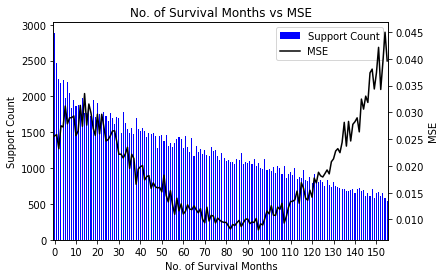

In [16]:
plt.clf()
plt.figure()
plt.title('No. of Survival Months vs MSE')
ax1=month_level['Support Count'].plot(use_index=True,kind='bar',color='b',xticks=range(0,160,10),legend=True)
ax2=month_level['MSE'].plot(kind='line',color='k',secondary_y=True,legend=True,mark_right=False)
ax1.set_xlabel('No. of Survival Months')
ax1.set_ylabel('Support Count')
ax2.set_ylabel('MSE')
plt.savefig('Breast Cancer ANN MSE.png')

Plot of RMSE vs the Number of Months Survived.

<Figure size 432x288 with 0 Axes>

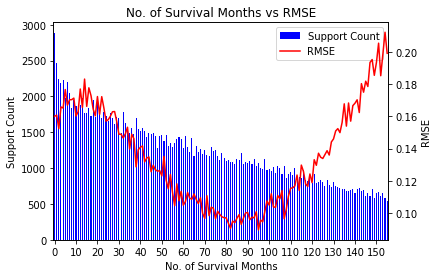

In [17]:
plt.clf()
plt.figure()
plt.title('No. of Survival Months vs RMSE')
ax1=month_level['Support Count'].plot(use_index=True,kind='bar',color='b',xticks=range(0,160,10),legend=True)
ax2=month_level['RMSE'].plot(kind='line',color='r',secondary_y=True,legend=True,mark_right=False)
ax1.set_xlabel('No. of Survival Months')
ax1.set_ylabel('Support Count')
ax2.set_ylabel('RMSE')
plt.savefig('Breast Cancer ANN RMSE.png')

## RNN Model

For both the RNN and CNN models, we need the input to be 3-dimensional including the timesteps. Therefore, reshaping the 2-D array into 3-D space.

In [18]:
scaler1=MinMaxScaler()
scaler2=MinMaxScaler()

data_scaled=scaler1.fit_transform(data)
target_scaled=scaler2.fit_transform(target)

data_scaled=data_scaled.reshape(data_scaled.shape[0],1,data_scaled.shape[1])

A function to define the structure of the RNN with 2 hidden layers with [50,20] neurons each and ReLU activation function. The output layer is just a single neuron with no activation function as this is a regression problem. 20% Dropout layers are present after every hidden to prevent overfitting of the model.

Loss Function- Mean Squared Error

Optimizer- ADAM

Observed Metrics- MSE, RMSE, R-Square

In [19]:
def build_model_rnn():
    model=Sequential()
    
    model.add(LSTM(50, input_shape=data_scaled.shape[1:], return_sequences=True,activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(20, return_sequences=False,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse',rmse,r_sq])
    
    return model

Building a scikit wrapper on top of Keras model to be able use the functions from Scikit-Learn for easier training.

An initial fit of the model is developed over a large number of epochs to determine point of overfitting of the model. The whole dataset is also split into training and test sets in the ratio of 80:20.

In [20]:
estimators=KerasRegressor(build_fn=build_model_rnn, epochs=50, batch_size=256, verbose=1)
train_data,test_data,train_target,test_target=train_test_split(data_scaled,target_scaled,test_size=0.2,random_state=21)

seed(21)
set_random_seed(21)

history=estimators.fit(train_data,train_target,validation_data=(test_data,test_target))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 770876 samples, validate on 192720 samples
Epoch 1/50
770876/770876 [==============================] - 51s 66us/step - loss: 0.0500 - mean_squared_error: 0.0500 - rmse: 0.2198 - r_sq: 0.3636 - val_loss: 0.0256 - val_mean_squared_error: 0.0256 - val_rmse: 0.1597 - val_r_sq: 0.6719
Epoch 2/50
770876/770876 [==============================] - 43s 56us/step - loss: 0.0275 - mean_squared_error: 0.0275 - rmse: 0.1654 - r_sq: 0.6498 - val_loss: 0.0233 - val_mean_squared_error: 0.0233 - val_rmse: 0.1521 - val_r_sq: 0.7022
Epoch 3/50
770876/770876 [==============================] - 46s 60us/step - loss: 0.0257 - mean_squared_error: 0.0257 - rmse: 0.1599 - r_sq: 0.6729 - val_loss: 0.0218 - val_mean_squared_error: 0.0218 - val_rmse: 0.1473 - val_r_sq: 0.7205
Epoch 4/50
770876/770876 [==============================] - 44s 57us/step - loss: 0.0245 - mean_squared_error: 0.0245 -

C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


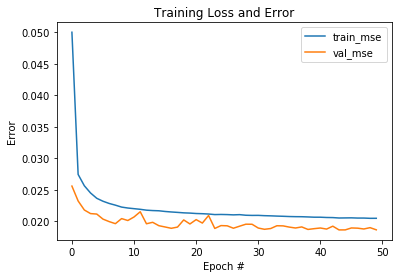

In [21]:
epoch_num = pd.np.arange(0, 50)
plt.figure()
plt.plot(epoch_num, history.history["mean_squared_error"], label="train_mse")
plt.plot(epoch_num, history.history["val_mean_squared_error"], label="val_mse")
#plt.plot(epoch_num, history.history["r_sq"], label="train_r_square")
#plt.plot(epoch_num, history.history["val_r_sq"], label="val_r_square")
plt.title("Training Loss and Error")
plt.xlabel("Epoch #")
plt.ylabel("Error")
plt.legend()
plt.savefig('Breast Cancer RNN.png')

From the Training Graph, it is evident that the validation loss stabilizes near the 25th epoch while the trianing loss also satbilizes.Hence, 25 is selcted as the cutoff for nmber of epochs.

Cross Validation is Performed to validate that the validation error do not deviate much when trained across differnet splits of the same dataset.

In [22]:
estimators=KerasRegressor(build_fn=build_model_rnn, epochs=25, batch_size=256, verbose=1)

#pipeline = Pipeline(estimators)
kfold = KFold(n_splits=5)
results = cross_val_score(estimators, data_scaled, target_scaled, cv=kfold)

Epoch 1/25
770876/770876 [==============================] - 257s 334us/step - loss: 0.0487 - mean_squared_error: 0.0487 - rmse: 0.2169 - r_sq: 0.3669
Epoch 2/25
770876/770876 [==============================] - 57s 74us/step - loss: 0.0269 - mean_squared_error: 0.0269 - rmse: 0.1636 - r_sq: 0.6504
Epoch 3/25
770876/770876 [==============================] - 35s 45us/step - loss: 0.0252 - mean_squared_error: 0.0252 - rmse: 0.1583 - r_sq: 0.6724
Epoch 4/25
770876/770876 [==============================] - 38s 49us/step - loss: 0.0241 - mean_squared_error: 0.0241 - rmse: 0.1547 - r_sq: 0.6869
Epoch 5/25
770876/770876 [==============================] - 38s 49us/step - loss: 0.0233 - mean_squared_error: 0.0233 - rmse: 0.1523 - r_sq: 0.6967
Epoch 6/25
770876/770876 [==============================] - 38s 50us/step - loss: 0.0228 - mean_squared_error: 0.0228 - rmse: 0.1505 - r_sq: 0.7039
Epoch 7/25
770876/770876 [==============================] - 44s 57us/step - loss: 0.0223 - mean_squared_error:

770877/770877 [==============================] - 88s 114us/step - loss: 0.0214 - mean_squared_error: 0.0214 - rmse: 0.1458 - r_sq: 0.7295
Epoch 16/25
770877/770877 [==============================] - 89s 115us/step - loss: 0.0212 - mean_squared_error: 0.0212 - rmse: 0.1453 - r_sq: 0.7313s - loss: 0.0212 - mean_squared_error: 0.0212 - rmse: 0.1453 
Epoch 17/25
770877/770877 [==============================] - 86s 111us/step - loss: 0.0212 - mean_squared_error: 0.0212 - rmse: 0.1452 - r_sq: 0.7316
Epoch 18/25
770877/770877 [==============================] - 86s 111us/step - loss: 0.0211 - mean_squared_error: 0.0211 - rmse: 0.1450 - r_sq: 0.7325s - loss: 0.0211 - mean_squared_error: 0.0211 - rmse: 0.1450 - r_sq: 0.
Epoch 19/25
770877/770877 [==============================] - 72s 94us/step - loss: 0.0211 - mean_squared_error: 0.0211 - rmse: 0.1448 - r_sq: 0.7333
Epoch 20/25
770877/770877 [==============================] - 44s 57us/step - loss: 0.0210 - mean_squared_error: 0.0210 - rmse: 0.14

Finding the mean and standard deviation of the Mean Squared Error form Cross Validation. We can see that it doesnot deviate much for different splits on the dataset.

In [23]:
print("MSE Score: %.6f (%.6f) MSE" % (results.mean(), results.std()))

print(results)

MSE Score: -0.026314 (0.004299) MSE
[-0.03268491 -0.02287634 -0.02551614 -0.02094051 -0.02955043]


Refitting the model witout overfitting the model over large number of epochs

In [24]:
estimators=KerasRegressor(build_fn=build_model_rnn, epochs=25, batch_size=256, verbose=1)
history=estimators.fit(train_data,train_target,validation_data=(test_data,test_target))

Train on 770876 samples, validate on 192720 samples
Epoch 1/25
770876/770876 [==============================] - 311s 404us/step - loss: 0.0490 - mean_squared_error: 0.0490 - rmse: 0.2174 - r_sq: 0.3767 - val_loss: 0.0265 - val_mean_squared_error: 0.0265 - val_rmse: 0.1626 - val_r_sq: 0.6603
Epoch 2/25
770876/770876 [==============================] - 102s 132us/step - loss: 0.0277 - mean_squared_error: 0.0277 - rmse: 0.1662 - r_sq: 0.6466 - val_loss: 0.0231 - val_mean_squared_error: 0.0231 - val_rmse: 0.1515 - val_r_sq: 0.7047
Epoch 3/25
770876/770876 [==============================] - 100s 130us/step - loss: 0.0257 - mean_squared_error: 0.0257 - rmse: 0.1601 - r_sq: 0.6719 - val_loss: 0.0234 - val_mean_squared_error: 0.0234 - val_rmse: 0.1526 - val_r_sq: 0.70030257 - rmse: 0.1
Epoch 4/25
770876/770876 [==============================] - 99s 128us/step - loss: 0.0247 - mean_squared_error: 0.0247 - rmse: 0.1567 - r_sq: 0.6857 - val_loss: 0.0214 - val_mean_squared_error: 0.0214 - val_rmse:

Performance on Test Set

In [25]:
test_pred=estimators.predict(test_data)
print('\nTest Set Perfromance\n')
print('MSE=',mean_squared_error(test_target,test_pred))
print('RMSE=',math.sqrt(mean_squared_error(test_target,test_pred)))
print('R Square=',r2_score(test_target,test_pred))

192720/192720 [==============================] - 91s 473us/step

Test Set Perfromance

MSE= 0.019589924158217916
RMSE= 0.1399640102248357
R Square= 0.7504746871052952


Understanding the Performance across different classes.

In [26]:
compare_test_data=pd.DataFrame({'SRV_TIME_MON':test_target[:,0],'Pred':test_pred})
compare_test_data['Months Unscaled']=scaler2.inverse_transform(test_target)

compare_test_data['survival_classes']=compare_test_data.apply(lambda row: 
    '<=5yrs' if (row['Months Unscaled']<=60) 
    else ('5-10yrs'  if (row['Months Unscaled']<=120) else '>10yrs'),axis=1)

classes=list(compare_test_data['survival_classes'].unique())
dct1=dict()

for each_class in classes:
    subset=compare_test_data[compare_test_data['survival_classes']==each_class]
    mse=mean_squared_error(subset['SRV_TIME_MON'],subset['Pred'])
    rootmse=math.sqrt(mean_squared_error(subset['SRV_TIME_MON'],subset['Pred']))
    dct1[each_class]=[mse,rootmse,len(subset)]

months=list(compare_test_data['Months Unscaled'].unique())
dct2=dict()

for month in months:
    subset=compare_test_data[compare_test_data['Months Unscaled']==month]
    mse=mean_squared_error(subset['SRV_TIME_MON'],subset['Pred'])
    rootmse=math.sqrt(mean_squared_error(subset['SRV_TIME_MON'],subset['Pred']))
    dct2[month]=[mse,rootmse,len(subset)]

class_level=pd.DataFrame.from_dict(dct1,orient='index',columns=['MSE','RMSE','Support Count'])
month_level=pd.DataFrame.from_dict(dct2,orient='index',columns=['MSE','RMSE','Support Count'])
month_level.sort_index(axis=0,inplace=True)

print(class_level)

              MSE      RMSE  Support Count
5-10yrs  0.014504  0.120432          64488
<=5yrs   0.019688  0.140314         103477
>10yrs   0.032430  0.180082          24755


Plot of MSE vs No. of Months Survived

<Figure size 432x288 with 0 Axes>

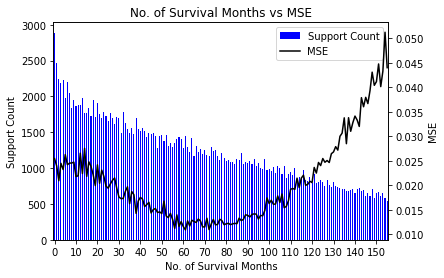

In [27]:
plt.clf()
plt.figure()
plt.title('No. of Survival Months vs MSE')
ax1=month_level['Support Count'].plot(use_index=True,kind='bar',color='b',xticks=range(0,160,10),legend=True)
ax2=month_level['MSE'].plot(kind='line',color='k',secondary_y=True,legend=True,mark_right=False)
ax1.set_xlabel('No. of Survival Months')
ax1.set_ylabel('Support Count')
ax2.set_ylabel('MSE')
plt.savefig('Breast Cancer RNN MSE.png')

Plot of RMSE vs No. of Months Survived

<Figure size 432x288 with 0 Axes>

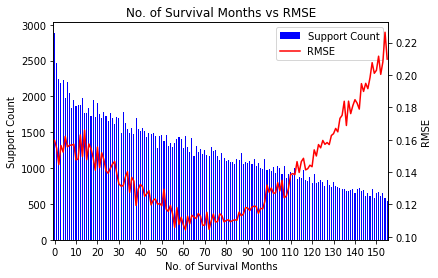

In [28]:
plt.clf()
plt.figure()
plt.title('No. of Survival Months vs RMSE')
ax1=month_level['Support Count'].plot(use_index=True,kind='bar',color='b',xticks=range(0,160,10),legend=True)
ax2=month_level['RMSE'].plot(kind='line',color='r',secondary_y=True,legend=True,mark_right=False)
ax1.set_xlabel('No. of Survival Months')
ax1.set_ylabel('Support Count')
ax2.set_ylabel('RMSE')
plt.savefig('Breast Cancer RNN RMSE.png')

## CNN Model 

A function to define the structure of the CNN with 2 hidden layers with [40,20] neurons each and ReLU activation function. The output layer is just a single neuron with no activation function as this is a regression problem. Conv1D layers are used as hidden layers and flattened just before output layer.

Loss Function- Mean Squared Error

Optimizer- ADAM

Observed Metrics- MSE, RMSE, R-Square

In [29]:
def build_model_cnn():
    model=Sequential()
    
    model.add(Conv1D(40, 1, input_shape=train_data.shape[1:], activation='relu'))
    model.add(Conv1D(20, 1, activation='relu')) 
    model.add(Flatten())
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse',rmse,r_sq])
    
    return model

Building a scikit wrapper on top of Keras model to be able use the functions from Scikit-Learn for easier training.

An initial fit of the model is developed over a large number of epochs to determine point of overfitting of the model. The whole dataset is also split into training and test sets in the ratio of 80:20.

In [31]:
estimators=KerasRegressor(build_fn=build_model_cnn, epochs=100, batch_size=256, verbose=1)
train_data,test_data,train_target,test_target=train_test_split(data_scaled,target_scaled,test_size=0.2,random_state=21)

seed(21)
set_random_seed(21)

history=estimators.fit(train_data,train_target,validation_data=(test_data,test_target))

Train on 770876 samples, validate on 192720 samples
Epoch 1/100
  3328/770876 [..............................] - ETA: 6:42:23 - loss: 0.1944 - mean_squared_error: 0.1944 - rmse: 0.4364 - r_sq: -1.4732 

C:\Users\dshre\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.241632). Check your callbacks.
  % delta_t_median)


770876/770876 [==============================] - 139s 180us/step - loss: 0.0416 - mean_squared_error: 0.0416 - rmse: 0.1997 - r_sq: 0.4707 - val_loss: 0.0267 - val_mean_squared_error: 0.0267 - val_rmse: 0.1628 - val_r_sq: 0.6583
Epoch 2/100
770876/770876 [==============================] - 18s 24us/step - loss: 0.0243 - mean_squared_error: 0.0243 - rmse: 0.1555 - r_sq: 0.6899 - val_loss: 0.0285 - val_mean_squared_error: 0.0285 - val_rmse: 0.1685 - val_r_sq: 0.6351
Epoch 3/100
770876/770876 [==============================] - 17s 21us/step - loss: 0.0224 - mean_squared_error: 0.0224 - rmse: 0.1492 - r_sq: 0.7145 - val_loss: 0.0216 - val_mean_squared_error: 0.0216 - val_rmse: 0.1463 - val_r_sq: 0.7238
Epoch 4/100
770876/770876 [==============================] - 16s 21us/step - loss: 0.0213 - mean_squared_error: 0.0213 - rmse: 0.1454 - r_sq: 0.7287 - val_loss: 0.0207 - val_mean_squared_error: 0.0207 - val_rmse: 0.1435 - val_r_sq: 0.7341
Epoch 5/100
770876/770876 [===========================

770876/770876 [==============================] - 16s 21us/step - loss: 0.0180 - mean_squared_error: 0.0180 - rmse: 0.1336 - r_sq: 0.7707 - val_loss: 0.0186 - val_mean_squared_error: 0.0186 - val_rmse: 0.1359 - val_r_sq: 0.7615
Epoch 70/100
770876/770876 [==============================] - 16s 21us/step - loss: 0.0180 - mean_squared_error: 0.0180 - rmse: 0.1337 - r_sq: 0.7703 - val_loss: 0.0188 - val_mean_squared_error: 0.0188 - val_rmse: 0.1366 - val_r_sq: 0.7591
Epoch 71/100
770876/770876 [==============================] - 16s 21us/step - loss: 0.0180 - mean_squared_error: 0.0180 - rmse: 0.1335 - r_sq: 0.7709 - val_loss: 0.0186 - val_mean_squared_error: 0.0186 - val_rmse: 0.1360 - val_r_sq: 0.7611
Epoch 72/100
770876/770876 [==============================] - 16s 21us/step - loss: 0.0179 - mean_squared_error: 0.0179 - rmse: 0.1335 - r_sq: 0.7711 - val_loss: 0.0189 - val_mean_squared_error: 0.0189 - val_rmse: 0.1370 - val_r_sq: 0.7580
Epoch 73/100
770876/770876 [=========================

C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


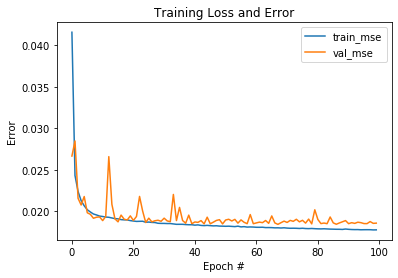

In [32]:
epoch_num = pd.np.arange(0, 100)
plt.figure()
plt.plot(epoch_num, history.history["mean_squared_error"], label="train_mse")
plt.plot(epoch_num, history.history["val_mean_squared_error"], label="val_mse")
#plt.plot(epoch_num, history.history["r_sq"], label="train_r_square")
#plt.plot(epoch_num, history.history["val_r_sq"], label="val_r_square")
plt.title("Training Loss and Error")
plt.xlabel("Epoch #")
plt.ylabel("Error")
plt.legend()
plt.savefig('Breast Cancer CNN.png')

From the Training Graph, it is evident that the validation loss stabilizes near the 50th epoch while the trianing loss decreases.Hence, 50 is selcted as the cutoff for number of epochs.

Cross Validation is Performed to validate that the validation error do not deviate much when trained across differenet splits of the same dataset.

In [33]:
estimators=KerasRegressor(build_fn=build_model_cnn, epochs=50, batch_size=256, verbose=1)

#pipeline = Pipeline(estimators)
kfold = KFold(n_splits=5)
results = cross_val_score(estimators, data_scaled, target_scaled, cv=kfold)

Epoch 1/50
770876/770876 [==============================] - 99s 129us/step - loss: 0.0407 - mean_squared_error: 0.0407 - rmse: 0.1978 - r_sq: 0.4711
Epoch 2/50
770876/770876 [==============================] - 14s 19us/step - loss: 0.0236 - mean_squared_error: 0.0236 - rmse: 0.1531 - r_sq: 0.6934
Epoch 3/50
770876/770876 [==============================] - 15s 19us/step - loss: 0.0219 - mean_squared_error: 0.0219 - rmse: 0.1476 - r_sq: 0.7149
Epoch 4/50
770876/770876 [==============================] - 15s 19us/step - loss: 0.0209 - mean_squared_error: 0.0209 - rmse: 0.1442 - r_sq: 0.7276
Epoch 5/50
770876/770876 [==============================] - 14s 18us/step - loss: 0.0203 - mean_squared_error: 0.0203 - rmse: 0.1419 - r_sq: 0.7361
Epoch 6/50
770876/770876 [==============================] - 17s 22us/step - loss: 0.0198 - mean_squared_error: 0.0198 - rmse: 0.1402 - r_sq: 0.7422
Epoch 7/50
770876/770876 [==============================] - 16s 21us/step - loss: 0.0195 - mean_squared_error: 

770877/770877 [==============================] - 16s 21us/step - loss: 0.0191 - mean_squared_error: 0.0191 - rmse: 0.1379 - r_sq: 0.7493
Epoch 10/50
770877/770877 [==============================] - 15s 20us/step - loss: 0.0190 - mean_squared_error: 0.0190 - rmse: 0.1372 - r_sq: 0.7515
Epoch 11/50
770877/770877 [==============================] - 16s 20us/step - loss: 0.0188 - mean_squared_error: 0.0188 - rmse: 0.1367 - r_sq: 0.7536
Epoch 12/50
770877/770877 [==============================] - 16s 20us/step - loss: 0.0187 - mean_squared_error: 0.0187 - rmse: 0.1364 - r_sq: 0.7545
Epoch 13/50
770877/770877 [==============================] - 15s 20us/step - loss: 0.0187 - mean_squared_error: 0.0187 - rmse: 0.1361 - r_sq: 0.7555
Epoch 14/50
770877/770877 [==============================] - 15s 20us/step - loss: 0.0186 - mean_squared_error: 0.0186 - rmse: 0.1359 - r_sq: 0.7563
Epoch 15/50
770877/770877 [==============================] - 16s 21us/step - loss: 0.0185 - mean_squared_error: 0.0185

770877/770877 [==============================] - 14s 19us/step - loss: 0.0190 - mean_squared_error: 0.0190 - rmse: 0.1374 - r_sq: 0.7542
Epoch 18/50
770877/770877 [==============================] - 14s 19us/step - loss: 0.0190 - mean_squared_error: 0.0190 - rmse: 0.1375 - r_sq: 0.7540
Epoch 19/50
770877/770877 [==============================] - 15s 19us/step - loss: 0.0189 - mean_squared_error: 0.0189 - rmse: 0.1371 - r_sq: 0.7552
Epoch 20/50
770877/770877 [==============================] - 15s 20us/step - loss: 0.0189 - mean_squared_error: 0.0189 - rmse: 0.1370 - r_sq: 0.7558
Epoch 21/50
770877/770877 [==============================] - 15s 19us/step - loss: 0.0189 - mean_squared_error: 0.0189 - rmse: 0.1369 - r_sq: 0.7559
Epoch 22/50
770877/770877 [==============================] - 14s 19us/step - loss: 0.0188 - mean_squared_error: 0.0188 - rmse: 0.1367 - r_sq: 0.7568
Epoch 23/50
770877/770877 [==============================] - 14s 19us/step - loss: 0.0188 - mean_squared_error: 0.0188

Finding the mean and standard deviation of the Mean Squared Error from Cross Validation. We can see that it doesnot deviate much for different splits on the dataset.

In [34]:
print("MSE Score: %.6f (%.6f) MSE" % (results.mean(), results.std()))

print(results)

MSE Score: -0.026930 (0.006556) MSE
[-0.03315769 -0.01997598 -0.02348863 -0.02169116 -0.03633713]


Refitting the model witout overfitting the model over large number of epochs

In [35]:
estimators=KerasRegressor(build_fn=build_model_cnn, epochs=50, batch_size=256, verbose=1)
history=estimators.fit(train_data,train_target,validation_data=(test_data,test_target))

Train on 770876 samples, validate on 192720 samples
Epoch 1/50
770876/770876 [==============================] - 146s 189us/step - loss: 0.0412 - mean_squared_error: 0.0412 - rmse: 0.1990 - r_sq: 0.4757 - val_loss: 0.0260 - val_mean_squared_error: 0.0260 - val_rmse: 0.1608 - val_r_sq: 0.6672
Epoch 2/50
770876/770876 [==============================] - 18s 23us/step - loss: 0.0240 - mean_squared_error: 0.0240 - rmse: 0.1544 - r_sq: 0.6945 - val_loss: 0.0228 - val_mean_squared_error: 0.0228 - val_rmse: 0.1505 - val_r_sq: 0.7081
Epoch 3/50
770876/770876 [==============================] - 17s 22us/step - loss: 0.0223 - mean_squared_error: 0.0223 - rmse: 0.1489 - r_sq: 0.7157 - val_loss: 0.0213 - val_mean_squared_error: 0.0213 - val_rmse: 0.1455 - val_r_sq: 0.7274
Epoch 4/50
770876/770876 [==============================] - 17s 22us/step - loss: 0.0213 - mean_squared_error: 0.0213 - rmse: 0.1456 - r_sq: 0.7281 - val_loss: 0.0210 - val_mean_squared_error: 0.0210 - val_rmse: 0.1445 - val_r_sq: 0

Performance on Test Set

In [36]:
test_pred=estimators.predict(test_data)
print('\nTest Set Performance\n')
print('MSE=',mean_squared_error(test_target,test_pred))
print('RMSE=',math.sqrt(mean_squared_error(test_target,test_pred)))
print('R Square=',r2_score(test_target,test_pred))

192720/192720 [==============================] - 3s 15us/step

Test Set Performance

MSE= 0.01854932957448203
RMSE= 0.13619592348701937
R Square= 0.7637291891138855


Understanding the Performance across different classes.

In [37]:
compare_test_data=pd.DataFrame({'SRV_TIME_MON':test_target[:,0],'Pred':test_pred})
compare_test_data['Months Unscaled']=scaler2.inverse_transform(test_target)

compare_test_data['survival_classes']=compare_test_data.apply(lambda row: 
    '<=5yrs' if (row['Months Unscaled']<=60) 
    else ('5-10yrs'  if (row['Months Unscaled']<=120) else '>10yrs'),axis=1)

classes=list(compare_test_data['survival_classes'].unique())
dct1=dict()

for each_class in classes:
    subset=compare_test_data[compare_test_data['survival_classes']==each_class]
    mse=mean_squared_error(subset['SRV_TIME_MON'],subset['Pred'])
    rootmse=math.sqrt(mean_squared_error(subset['SRV_TIME_MON'],subset['Pred']))
    dct1[each_class]=[mse,rootmse,len(subset)]

months=list(compare_test_data['Months Unscaled'].unique())
dct2=dict()

for month in months:
    subset=compare_test_data[compare_test_data['Months Unscaled']==month]
    mse=mean_squared_error(subset['SRV_TIME_MON'],subset['Pred'])
    rootmse=math.sqrt(mean_squared_error(subset['SRV_TIME_MON'],subset['Pred']))
    dct2[month]=[mse,rootmse,len(subset)]

class_level=pd.DataFrame.from_dict(dct1,orient='index',columns=['MSE','RMSE','Support Count'])
month_level=pd.DataFrame.from_dict(dct2,orient='index',columns=['MSE','RMSE','Support Count'])
month_level.sort_index(axis=0,inplace=True)

print(class_level)

              MSE      RMSE  Support Count
5-10yrs  0.011205  0.105853          64488
<=5yrs   0.021712  0.147349         103477
>10yrs   0.024463  0.156408          24755


Plot of MSE vs No. of Months Survived

<Figure size 432x288 with 0 Axes>

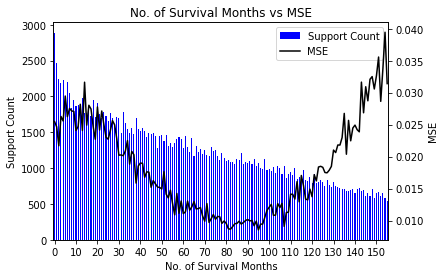

In [38]:
plt.clf()
plt.figure()
plt.title('No. of Survival Months vs MSE')
ax1=month_level['Support Count'].plot(use_index=True,kind='bar',color='b',xticks=range(0,160,10),legend=True)
ax2=month_level['MSE'].plot(kind='line',color='k',secondary_y=True,legend=True,mark_right=False)
ax1.set_xlabel('No. of Survival Months')
ax1.set_ylabel('Support Count')
ax2.set_ylabel('MSE')
plt.savefig('Breast Cancer CNN MSE.png')

Plot of RMSE vs No. of Months Survived

<Figure size 432x288 with 0 Axes>

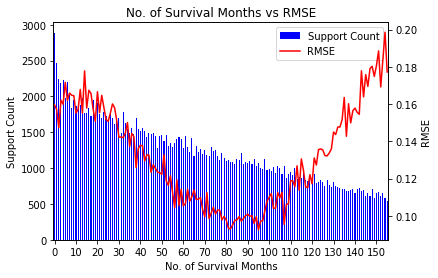

In [39]:
plt.clf()
plt.figure()
plt.title('No. of Survival Months vs RMSE')
ax1=month_level['Support Count'].plot(use_index=True,kind='bar',color='b',xticks=range(0,160,10),legend=True)
ax2=month_level['RMSE'].plot(kind='line',color='r',secondary_y=True,legend=True,mark_right=False)
ax1.set_xlabel('No. of Survival Months')
ax1.set_ylabel('Support Count')
ax2.set_ylabel('RMSE')
plt.savefig('Breast Cancer CNN RMSE.png')